In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
def benchmark(mood_data):
    return mood_data.diff()

In [6]:
# Load the mood data per user, and create a general average mood as well.

users = list(pd.read_csv('dataset_mood_smartphone.csv').id.unique())
moodframe = pd.DataFrame(columns=users)
MSEframe = pd.DataFrame(columns=users)

for user in users:
    if("32" in user):
        continue
    df = pd.read_csv('data_normalized/' + user +'.csv')
    df.head()
    moodframe[user] = df["mood"]
    
#General case. Only valid if we compare moods of users on the same day.
#moodframe["total"] = moodframe.mean(axis=1)    

# Run the benchmark per user and the general case and  Report MSE
for user in users:
    MSEframe[user] = benchmark(moodframe[user])
#MSEframe.head()

# Plot error distribution for each user
#fig, axes = plt.subplots(9,3)


MSEframe.head()
#fig, axes = plt.subplots(len(MSEframe.columns)//3, 3, figsize=(12, 48))
#for i in range(len(MSEframe.columns)//3):
#    for j in range(3):
#        MSEframe.hist(MSEframe.columns[i*3+j],  ax=axes[i, j], normed=True)
#        mu = MSEframe[users[i*3+j]].mean()
#        sigma = MSEframe[users[i*3+j]].std()
#        x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
#        axes[i,j].plot(x, st.norm.pdf(x, mu, sigma))


,AS14.01,AS14.02,AS14.03,AS14.05,AS14.06,AS14.07,AS14.08,AS14.09,AS14.12,AS14.13,...,AS14.24,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.20,1.45,0.40,1.50,0.0,-1.066667,1.0,-0.25,-0.25,0.0,...,-0.25,-0.60,0.4,-0.4,1.00,-1.25,0.8,-0.066667,NaN,1.6
2,0.40,-1.40,-0.40,-0.75,1.0,0.200000,0.6,0.50,0.00,2.0,...,0.50,-0.90,-0.6,0.4,-0.70,0.75,-0.2,0.200000,NaN,-1.8
3,-0.80,0.45,0.00,0.45,-1.0,1.450000,-0.6,-1.05,-0.95,-1.0,...,-2.30,1.25,0.0,-0.4,1.20,0.20,0.2,0.600000,NaN,2.8
4,0.75,0.25,0.45,0.05,0.6,-1.250000,0.2,1.55,0.60,1.4,...,1.20,-0.75,-0.8,0.6,-2.25,-0.45,0.0,-0.800000,NaN,-1.6


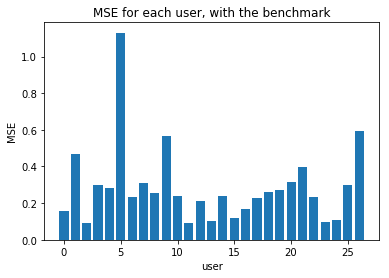

In [62]:
MSEs = np.asarray(MSEframe)
MSEs= MSEs[0]
plt.bar(range(len(MSEs)), MSEs)
plt.title("MSE for each user, with the benchmark")
plt.ylabel("MSE")
plt.xlabel("user")
plt.show()

In [ ]:
p = 0.05

Qs = np.zeros(len(users))
Wilcoxon = np.zeros(scipy.special.comb(len(algorithms), 2))

for idx, user in enumerate(users):
    Qs[] = scipy.stats. 


